# Kimo Implementation of Assignment 1

In [2]:
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
from PIL import Image

In [3]:
# Load image
image1 = Image.open("test1.png")
image1 = np.array(image1)
image1 = Image.open("test2.png")
image1 = np.array(image1)
image1 = Image.open("test3.png")
image1 = np.array(image1)
image1 = Image.open("test4.png")
image1 = np.array(image1)
image1 = Image.open("test5.png")
image1 = np.array(image1)
image1 = Image.open("test6.png")
image1 = np.array(image1)
image1 = Image.open("test7.png")
image1 = np.array(image1)
plt.imshow(image1, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\GUC\\Semester 9\\Computer Vision\\Computer-Vision-Assignments\\assignment1\\test4.png'

In [ ]:
image1.dtype, image1.max(), image1.min(), image1.shape

(dtype('uint8'), 255, 0, (1520, 2688))

## 1.Calculate Histograms

#### a. Calculate Histogram

In [4]:
# Calculate histogram of the given 2d array images
def CalculateHistogram(image: np.array) -> np.array:
    max = np.max(image)
    min = np.min(image)
    hist = np.zeros(max + 1 - min, dtype=np.float64)
    for i in range(len(image)):
        for j in range(len(image[i])):
            hist[image[i][j] - min] += 1
    return hist

hist = CalculateHistogram(image1)
hist 

array([  632.,   449.,   622.,   934.,  1194.,  1533.,  1929.,     0.,
        2089.,  2083.,  2254.,  2488.,  2235.,  2237.,     0.,  2176.,
        2207.,  2448.,  2750.,  2860.,  2811.,     0.,  2753.,  2848.,
        2909.,  3026.,  3437.,  3714.,     0.,  3708.,  4124.,  4278.,
        4678.,  5596.,  6328.,     0.,  6149.,  6058.,  5853.,  6070.,
        6428.,  6945.,     0.,  7016.,  7381.,  7781.,  8268.,  8535.,
        8856.,     0.,  9199.,  9220.,  9668., 10185., 10568., 11532.,
           0., 12392., 13009., 13268., 13070., 12915., 12603.,     0.,
       12146., 12098., 11881., 11975., 11961., 11961.,     0., 12282.,
       12336., 12119., 12103., 11697., 11672.,     0., 11379., 11397.,
       11262., 11334., 11521., 11652.,     0., 12062., 11887., 12145.,
       12594., 12650., 12464., 12871.,     0., 12751., 13001., 12767.,
       12732., 12238., 11742.,     0., 11938., 12386., 12334., 12638.,
       13036., 12873.,     0., 12882., 12923., 12551., 12232., 12109.,
      

#### b. Calculate Cumulative Histogram

In [70]:
# Calculate the cumulative histogram of the given histogram
def CalculateCumulativeHistogram(hist: np.array) -> np.array:
    cum_hist = np.zeros(len(hist), dtype=np.float64)
    cum_hist[0] = hist[0]
    for i in range(1, len(hist)):
        cum_hist[i] = cum_hist[i - 1] + hist[i]
    return cum_hist

cum_hist = CalculateCumulativeHistogram(hist)
cum_hist

array([1.900000e+01, 3.200000e+01, 4.300000e+01, 7.100000e+01,
       1.150000e+02, 1.940000e+02, 3.650000e+02, 3.650000e+02,
       6.180000e+02, 1.058000e+03, 1.733000e+03, 2.884000e+03,
       4.811000e+03, 7.904000e+03, 7.904000e+03, 1.247600e+04,
       1.929200e+04, 2.865400e+04, 4.102200e+04, 5.745900e+04,
       7.798300e+04, 7.798300e+04, 1.030290e+05, 1.323150e+05,
       1.657180e+05, 2.031090e+05, 2.438000e+05, 2.877370e+05,
       2.877370e+05, 3.343870e+05, 3.831820e+05, 4.333870e+05,
       4.844650e+05, 5.366490e+05, 5.881490e+05, 5.881490e+05,
       6.404560e+05, 6.922240e+05, 7.439550e+05, 7.951700e+05,
       8.469180e+05, 8.987150e+05, 8.987150e+05, 9.496280e+05,
       9.996840e+05, 1.048880e+06, 1.096860e+06, 1.144526e+06,
       1.191206e+06, 1.191206e+06, 1.236977e+06, 1.282726e+06,
       1.327787e+06, 1.371908e+06, 1.415362e+06, 1.457405e+06,
       1.457405e+06, 1.498289e+06, 1.536920e+06, 1.574144e+06,
       1.609767e+06, 1.644115e+06, 1.677722e+06, 1.6777

## 2. Analyze Histogram

#### a. GetColorAtPercentage

In [72]:
# Get Color At Percentage
def GetColorAtPercentage(cum_hist: np.array, percentage: float) -> Tuple[int, int]:
  '''
  Returns the color at the given percentage from both ends of a cumulative histogram
  '''
  pix_count = cum_hist[-1]
  val1 = int(pix_count * percentage)
  val2 = int(pix_count * (1 - percentage))
  color1 = color2 = 0
  
  for i in range(len(cum_hist)):
    if cum_hist[i] >= val1:
      color1 = i
      break

  for i in range(len(cum_hist) - 1, -1, -1):
    if cum_hist[i] <= val2:
      color2 = i
      break

  return color1, color2

GetColorAtPercentage(cum_hist, 0.05)

(26, 201)

#### b. GetColorsAtMaxSlope

In [73]:
# Get Color At MaxSlope
def GetColorAtMaxSlope(cum_hist: np.array) -> Tuple[int, int]:
  '''
  Returns the color at the maximum slope of a cumulative histogram, for each pair of color intensities
  '''
  max_slope = 0
  max_slope_color_1 = 0
  max_slope_color_2 = 0
  for i in range(len(cum_hist) - 1):
    for j in range(i + 1, len(cum_hist)):
      diff = np.subtract(cum_hist[j], cum_hist[i], dtype=np.float64)  
      slope = np.divide(np.power(diff, 4, dtype=np.float64), j - i, dtype=np.float64)
      if slope > max_slope:
        max_slope = slope
        max_slope_color_1 = i
        max_slope_color_2 = j

  return max_slope_color_1, max_slope_color_2

GetColorAtMaxSlope(cum_hist)

(15, 225)

## 3. Modify Histogram

#### a. Stretch Contrast

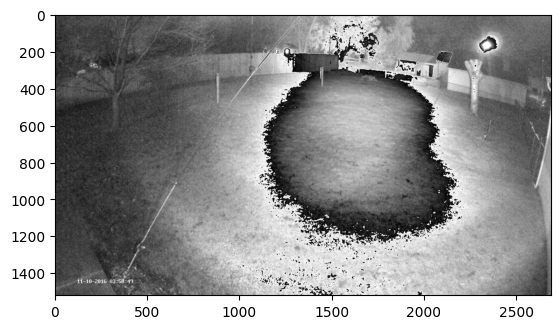

In [76]:
# Stretch Contrast
def StretchContrast(image: np.array, a: int, b: int, c: int, d: int) -> np.array:
  '''
  Stretch the contrast of the given image using the given parameters
  '''
  stretched_image = np.zeros(image.shape, dtype=np.uint8)
  for i in range(len(image)):
    for j in range(len(image[i])):
        stretched_image[i][j] = (image[i][j] - c) * ((b - a) / (d - c)) + a 
        if stretched_image[i][j] < a:
            stretched_image[i][j] = a
        if stretched_image[i][j] > b:
            stretched_image[i][j] = b
  return stretched_image

stretched_image = StretchContrast(image, 0, 255, 128, 255)
plt.imshow(stretched_image, cmap='gray')

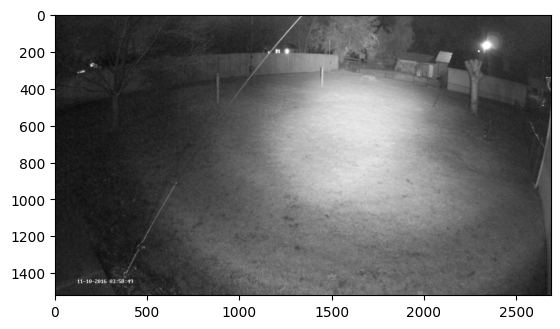

In [77]:
plt.imshow(image, cmap='gray')

#### b. EqualizeHistogram

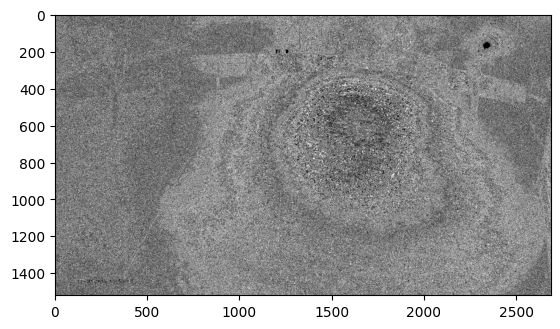

In [ ]:
# Equalize Histogram
def EqualizeHistogram(image: np.array, intensity1: int, intensity2: int):
  '''
  Equalize the histogram of the given image using the given intensities
  '''
  hist = CalculateHistogram(image)
  cum_hist = CalculateCumulativeHistogram(hist)
  freq_max, freq_min = cum_hist[-1], cum_hist[0]
  slope = (freq_max - freq_min) / (intensity2 - intensity1)
  c = freq_min - intensity1 * slope
  equalized_image = np.zeros(image.shape, dtype=np.uint8)
  for i in range(len(image)):
    for j in range(len(image[i])):
      equalized_image[i][j] = slope * image[i][j] + c
      if equalized_image[i][j] < intensity1:
        equalized_image[i][j] = intensity1
      if equalized_image[i][j] > intensity2:
        equalized_image[i][j] = intensity2
  return equalized_image